# Business Development Study - Recommending Ice Cream shop venue

Battle of Neighbourhoods - Capstone Project

This notebook contains the code for the 'Battle of Neighbourhoods' - Coursera Capstone Project on Data Science by IBM and Coursera

### Importing Necessary libraries before we start


In [29]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Downloading folium, if not installed
# !conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

### Jupyter command for full screen

In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Get Neighbourhoods in Bangalore and assigning variable `source` and iniatilizing `beautifulsoup` object to `soup`
Beautiful Soup is a Python library for pulling data out of HTML and XML files

In [31]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore').text 
soup = BeautifulSoup(source, 'lxml')

### Initialize `csv_writer` object and write name of columns on it as the first row

In [32]:
csv_file = open('bangalore.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

### Scrape the page to extract the list of neighbourhoods in Bangalore

In [33]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file    

csv_file.close()

### Read the csv into a pandas dataframe

In [34]:
df = pd.read_csv('bangalore.csv')
df.head()

,Neighbourhood
0,Adugodi
1,"Agara, Bangalore"
2,Ananthnagar
3,Anjanapura
4,Arekere


### Get the number of neighbourhoods in Bangalore

In [35]:
df.shape

(128, 1)

### Use geopy library to get the latitude and longitude values of the neieghbourhoods in Bangalore City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.


In [20]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array
geolocator = Nominatim(user_agent="ny_explorer1")
cnt=1
    
for nbd in df["Neighbourhood"] : 
    address = nbd + ",Bangalore,India" # Formats the place name
    # giving a time out of 15 seconds so that it waits before quitting
    location = geolocator.geocode(address, timeout=15)
    if (location):
        print("{} - {} - {}".format(cnt,address,location))
        lat = location.latitude
        lng = location.longitude
        latitudes.append(lat) # Appending to the list of latitudes
        longitudes.append(lng) # Appending to the list of longitudes 
        cnt=cnt + 1
    else:
        latitudes.append(0.0) # Appending to the list of latitudes
        longitudes.append(0.0) # Appending to the list of longitudes 
        print("location not found for {}".format(address))

1 - Adugodi,Bangalore,India - Adugodi, South Zone, Bengaluru, Bangalore Urban, Karnataka, 560095, India
2 - Agara, Bangalore,Bangalore,India - Agara, Kanakapura taluk, Ramanagara district, Karnataka, India
location not found for Ananthnagar,Bangalore,India
3 - Anjanapura,Bangalore,India - Anjanapura, Bommanahalli Zone, Bengaluru, Bangalore Urban, Karnataka, India
4 - Arekere,Bangalore,India - Arekere, Bommanahalli Zone, Bengaluru, Bangalore Urban, Karnataka, 560076, India
5 - Austin Town,Bangalore,India - Austin Town, East Zone, Bengaluru, Bangalore Urban, Karnataka, - 560095, India
location not found for Babusapalya,Bangalore,India
6 - Bagalur, Bangalore Urban,Bangalore,India - Bagaluru, Bangalore Urban, Karnataka, IAM IN BANG, India
location not found for Bahubalinagar,Bangalore,India
7 - Banashankari,Bangalore,India - Banashankari, Kanakapura Road, Banashankari Temple ward, South Zone, Bengaluru, Bangalore Urban, Karnataka, 560070, India
8 - Banaswadi,Bangalore,India - Banaswadi, Ea

66 - Madiwala,Bangalore,India - Madiwala, South Zone, Bengaluru, Bangalore Urban, Karnataka, - 560034, India
67 - Mahalakshmi Layout,Bangalore,India - Mahalakshmi Layout, 8th Main Road, Mahalakshimpuram Ward, West Zone, Bengaluru, Bangalore Urban, Karnataka, 560 055, India
68 - Malleswaram,Bangalore,India - Malleswaram, West Zone, Bengaluru, Bangalore Urban, Karnataka, 560055, India
69 - Marathahalli,Bangalore,India - Marathahalli, Mahadevapura Zone, Bengaluru, Bangalore Urban, Karnataka, 560037, India
location not found for Mariyannapalya,Bangalore,India
70 - Mathikere,Bangalore,India - Mathikere, Rajarajeshwari Nagar Zone, Bengaluru, Bangalore Urban, Karnataka, 560054, India
71 - Milk Colony,Bangalore,India - Milk Colony Malleshwaram, 1st Main Road, Subramanya Nagar, West Zone, Bengaluru, Bangalore Urban, Karnataka, 560055, India
72 - Murphy Town, Bangalore,Bangalore,India - Hoysala Nagar, Hoysala Nagara, East Zone, Bengaluru, Bangalore Urban, Karnataka, 560007, India
73 - Murugeshpa

### Adding the latitude and longitude values to the dataframe

In [36]:
df['Latitude'] = latitudes
df['Longitude'] = longitudes

In [37]:
print(df.shape)
df.head()

(128, 3)


,Neighbourhood,Latitude,Longitude
0,Adugodi,12.942847,77.610416
1,"Agara, Bangalore",12.620112,77.479307
2,Ananthnagar,0.000000,0.000000
3,Anjanapura,12.858081,77.558071
4,Arekere,12.887209,77.596049


Dropping neighbourhoods for which the lat long could not be found

In [38]:
df = df[(df['Latitude'] !=0.0) & (df['Longitude']!=0.0)]
print(df.shape)
df.head()

(110, 3)


,Neighbourhood,Latitude,Longitude
0,Adugodi,12.942847,77.610416
1,"Agara, Bangalore",12.620112,77.479307
3,Anjanapura,12.858081,77.558071
4,Arekere,12.887209,77.596049
5,Austin Town,12.961274,77.615294


### FourSquare API Credentials

In [39]:
CLIENT_ID = 'DJ3MPUB22DZUIQ1WRGMY3OAWJXEA1RVI0VEGRNOP0DO2P5FI' # your Foursquare ID
CLIENT_SECRET = 'LO2GMISI0O2FGV2GKIRSJQOJZVF1INEU1EYDMXJ41UPADBYY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DJ3MPUB22DZUIQ1WRGMY3OAWJXEA1RVI0VEGRNOP0DO2P5FI
CLIENT_SECRET:LO2GMISI0O2FGV2GKIRSJQOJZVF1INEU1EYDMXJ41UPADBYY


### Creating a folium map of Bangalore

In [41]:
# Bangalore latitude and longitude using Google search
blr_lat = 12.9116225
blr_lng = 77.6388622

# Creates map of Bangalore using latitude and longitude values
map_bangalore = folium.Map(location=[blr_lat, blr_lng], zoom_start=10)

# Add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

### Defining a function to get name of the category - get_category_type
Borrowing the get_category_type function from the Foursquare lab.

In [42]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Use the FourSquare API on all neighbourhoods

In [43]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighbourhood']):  
    
    try :
        ### Getting the data of neighbourhood
        nbd_name = df.loc[i, 'Neighbourhood']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

### Create dataframe for exploring and performing clustering operations

In [44]:
explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.to_csv("Bangalore_venues.csv")

In [45]:
explore_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Adugodi,12.942847,77.610416,PVR IMAX,Movie Theater,12.934595,77.611321
1,Adugodi,12.942847,77.610416,Lot Like Crêpes,Creperie,12.936421,77.613284
2,Adugodi,12.942847,77.610416,Tommy Hilfiger,Clothing Store,12.934552,77.611347
3,Adugodi,12.942847,77.610416,Koramangala Social,Lounge,12.935518,77.614097
4,Adugodi,12.942847,77.610416,PVR Cinemas,Multiplex,12.934389,77.611184


### Performing one-hot encoding to analyze neighbourhoods

In [46]:
# One hot encoding
bangalore_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
bangalore_onehot['Neighbourhood'] = explore_df['Neighbourhood'] 

# Move neighborhood column to the first column
fixed_columns = [bangalore_onehot.columns[-1]] + bangalore_onehot.columns[:-1].values.tolist()
bangalore_onehot = bangalore_onehot[fixed_columns]

bangalore_onehot.to_csv("Blr_encoded.csv")
bangalore_onehot.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Arcade,Art Gallery,Arts & Crafts Store,...,Theme Park,Toll Plaza,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Aggregating venues by neighbourhoods

In [47]:
bangalore_grouped = bangalore_onehot.groupby('Neighbourhood').mean().reset_index()
bangalore_grouped.to_csv("blr_grouped_venues.csv")
bangalore_grouped.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Arcade,Art Gallery,Arts & Crafts Store,...,Theme Park,Toll Plaza,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Adugodi,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Anjanapura,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Arekere,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Austin Town,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,BTM Layout,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.066667,0.0,0.0,0.0


### Create a function to return most common venues

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Creating a new dataframe to get the top 10 venues

In [49]:
num_top_venues = 15
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = bangalore_grouped['Neighbourhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.to_csv("blr_neighbourhoods_venues_sorted.csv")
print(neighbourhoods_venues_sorted.shape)
neighbourhoods_venues_sorted.head()

(88, 16)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Adugodi,Indian Restaurant,Lounge,Dessert Shop,Coffee Shop,Multiplex,Café,Donut Shop,Brewery,Creperie,Shopping Mall,Bookstore,Men's Store,Juice Bar,Punjabi Restaurant,Gaming Cafe
1,Anjanapura,ATM,Pool,Campground,Creperie,Cricket Ground,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dive Bar,Diner
2,Arekere,Indian Restaurant,Department Store,Pizza Place,Sporting Goods Shop,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Fish Market,Café,Business Service,BBQ Joint,South Indian Restaurant,Andhra Restaurant,Mughlai Restaurant,Burger Joint
3,Austin Town,Tea Room,Indian Restaurant,Cocktail Bar,Indie Movie Theater,Clothing Store,Middle Eastern Restaurant,Donut Shop,Café,Mediterranean Restaurant,Market,Shopping Mall,Soccer Stadium,Italian Restaurant,Boutique,Toy / Game Store
4,BTM Layout,Bakery,Snack Place,Ice Cream Shop,Vegetarian / Vegan Restaurant,Café,Pizza Place,Indian Restaurant,Chinese Restaurant,BBQ Joint,Sandwich Place,Dim Sum Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Park


In [50]:
print(neighbourhoods_venues_sorted.shape)

(88, 16)


### Setting the dataframe for k-means clustering to operate on 

In [51]:
bangalore_grouped_clustering = bangalore_grouped.drop('Neighbourhood', 1)
bangalore_grouped_clustering.to_csv("bangalore_grouped_clustering.csv")

### Using K-Means clustering

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [53]:
max_range = 25 # Maximum range of clusters

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = bangalore_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

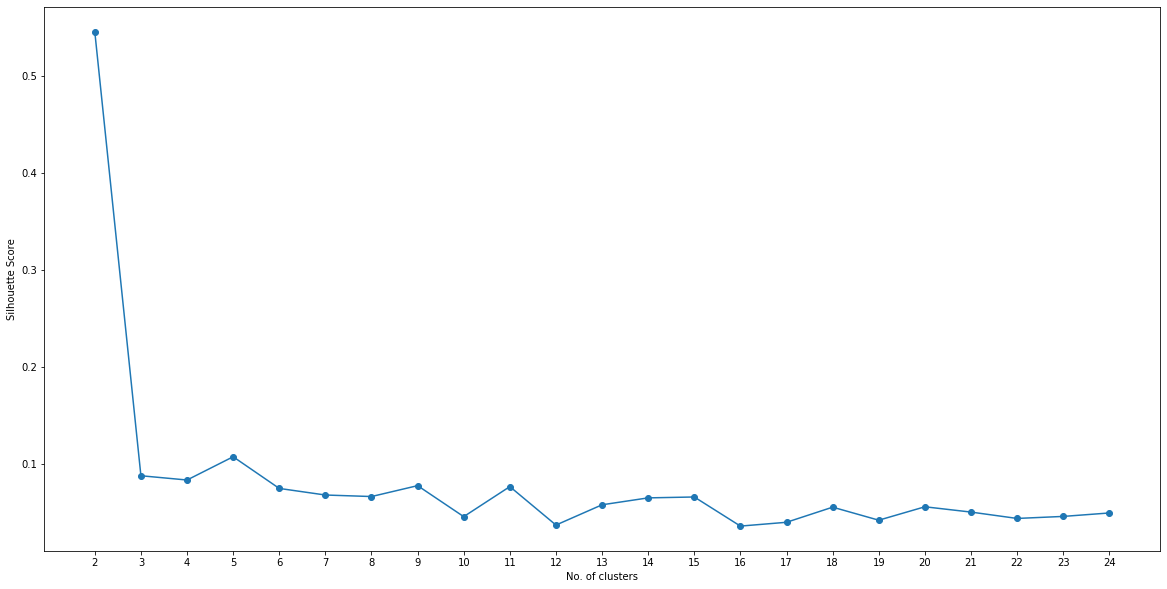

In [55]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### From the graph the optimal number is found out to be considered for our clustering

In [56]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

2

### K-Means clustering for the optimal number of clusters

In [57]:
kclusters = opt

# Run k-means clustering
kgc = bangalore_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [58]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Creating a dataframe containing the necessary data

In [59]:
bangalore_merged = df
bangalore_merged = bangalore_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
bangalore_merged.dropna(inplace = True)
bangalore_merged['Cluster Labels'] = bangalore_merged['Cluster Labels'].astype(int)
bangalore_merged.head()
bangalore_merged.to_csv("bangalore_merged_clusters.csv")

In [60]:
bangalore_merged.columns
print(bangalore_merged.shape)

(88, 19)


## Create a function for visualizing the clusters

In [62]:
def visualize(lat, lng, kclusters,dFrame):
    # Create map
    map_clusters = folium.Map(location=[blr_lat, blr_lng], zoom_start=11)

    # Set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # Add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(dFrame['Latitude'], dFrame['Longitude'], dFrame['Neighbourhood'], dFrame['Cluster Labels']):
        label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
        map_clusters.add_child(
            folium.features.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7))

    return map_clusters

In [63]:
mapclust = visualize(blr_lat, blr_lng, kclusters,bangalore_merged)
mapclust

From the above clustering, we can see that the majority of the clusters are falling under the same cluster (cluter1) with most common venue being eateries('Indian Restaurant', 'Kerala Restaurant' etc), apart from the remote areas like Bagalur, Ramagondanahalli etc.

### Filtering the bangalore neighbourhoods with most common venue with Indian Restaurants

In [64]:
filterinfDataframe = bangalore_merged[(bangalore_merged['1st Most Common Venue'] == 'Indian Restaurant') | 
                                    (bangalore_merged['2nd Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['3rd Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['4th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['5th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['6th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['7th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['8th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['9th Most Common Venue'] == 'Indian Restaurant') |
                                    (bangalore_merged['10th Most Common Venue'] == 'Indian Restaurant')]
print(filterinfDataframe.shape)
filterinfDataframe.to_csv("Bangalore_IndianRestaurants.csv")

(71, 19)


### Visualize locations of the clusters in bangalore which have most common venues with Restaurants

In [65]:
mapclust = visualize(blr_lat, blr_lng, kclusters,filterinfDataframe)
mapclust

### Filtering the bangalore neighbourhoods with most common venue with Indian Restaurants BUT which do not have ice Cream shops

In [66]:
filterinfDataframe_rest_ice = filterinfDataframe[(filterinfDataframe['1st Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['2nd Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['3rd Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['4th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['5th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['6th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['7th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['8th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['9th Most Common Venue'] != 'Ice Cream Shop') &
                                    (filterinfDataframe['10th Most Common Venue'] != 'Ice Cream Shop')]
print(filterinfDataframe_rest_ice.shape)
filterinfDataframe_rest_ice.to_csv("IndianRestaurants_noICS.csv")

(51, 19)


### Visualize neighbourhoods with Indian Restaurants BUT which do not have ice Cream shops ¶

In [67]:
mapclust = visualize(blr_lat, blr_lng, kclusters,filterinfDataframe_rest_ice)
mapclust

### Eliminate neighbourhoods with Indian Restaurants BUT which do not have Dessert Shops too ¶

In [68]:
filterinfDataframe_rest_noiceDessert = filterinfDataframe_rest_ice[(filterinfDataframe_rest_ice['1st Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['2nd Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['3rd Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['4th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['5th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['6th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['7th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['8th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['9th Most Common Venue'] != 'Dessert Shop') &
                                    (filterinfDataframe_rest_ice['10th Most Common Venue'] != 'Dessert Shop')]
print(filterinfDataframe_rest_noiceDessert.shape)
filterinfDataframe_rest_noiceDessert.to_csv("IndianRestaurants_noICSDessert.csv")

(44, 19)


In [69]:
mapclust = visualize(blr_lat, blr_lng, kclusters,filterinfDataframe_rest_noiceDessert)
mapclust

### Narrowing Down further, since we are looking for a neoghbourhood which families might visit, we might as look for areas with Clothing Store

In [70]:
dfRestCloth_noiceDessert = filterinfDataframe_rest_noiceDessert[(filterinfDataframe_rest_noiceDessert['1st Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['2nd Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['3rd Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['4th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['5th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['6th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['7th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['8th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['9th Most Common Venue'] == 'Clothing Store') |
                                    (filterinfDataframe_rest_noiceDessert['10th Most Common Venue'] == 'Clothing Store')]
print(dfRestCloth_noiceDessert.shape)
dfRestCloth_noiceDessert.to_csv("IndianRestaurants_clothing_noICSDessert.csv")

(9, 19)


In [71]:
mapclust = visualize(blr_lat, blr_lng, kclusters,dfRestCloth_noiceDessert)
mapclust

### Assuming that Juice bars will also serve desserts and ice creams, eliminate the same from the target neighbourhood list

In [72]:
dfRestCloth_noiceDessertJuice = dfRestCloth_noiceDessert[(dfRestCloth_noiceDessert['1st Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['2nd Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['3rd Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['4th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['5th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['6th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['7th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['8th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['9th Most Common Venue'] != 'Juice Bar') &
                                    (dfRestCloth_noiceDessert['10th Most Common Venue'] != 'Juice Bar')]
print(dfRestCloth_noiceDessertJuice.shape)
dfRestCloth_noiceDessertJuice.to_csv("IndianRestaurants_clothing_noICSDessertJuice.csv")

(8, 19)


In [73]:
mapclust = visualize(blr_lat, blr_lng, kclusters,dfRestCloth_noiceDessertJuice)
mapclust

#### To find an Ice cream storefront site accessible from main roads, with easy access, and with sufficient customer parking, we need to look for locations near businesses, like children’s clothing stores or Indian restaurants. To narrow down our search and visualize at each step helps the Stakeholders to make business decisions as per company strategy


#### From my knowledge, since Jakkur is emerging as an upcoming residential property market and not reached full potential, this could possibly be a good candidate for opening an Ice cream shop